In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DEFAULT_INPUT = "input.txt"
input_ = open(DEFAULT_INPUT, "r")
data = input_.read()
print(data)

00000000000000000000000000000000
00000000000000000000000000000000
00001000000000000000000000000000
00000100000000000000111000000000
00011100000000000001110000000000
00000000000000000000000000000000
00000000000000000000000000010000
00000000000000000000000000010000
00000000000000000000000000010000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000011100000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00110000000000000000000000000000
00110000000000000000000000000000
00001100000000000000000000000000
00001100000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00011000000000000000000000000000
00100100000000000000000000000000
00010100000000000000000000000000
0000100000

In [3]:
data_splitted = data.split()
print(data_splitted[0]) 

00000000000000000000000000000000


In [4]:
matrix = []
for line in data_splitted:
    matrix.append(list(map(int, line)))

In [5]:
import numpy as np
np.set_printoptions(threshold=np.inf)
matrix = np.array(matrix)

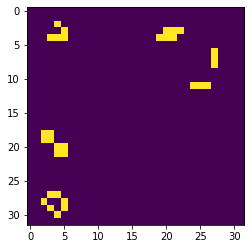

In [6]:
def initialise(x, y):
    cells = np.zeros((x, y))
    cells[0:matrix.shape[0], 0:matrix.shape[1]] = matrix
    return cells

cells = initialise(32, 32)
plt.imshow(cells)

1. fewer than 2 living neighbouring cells -> dead
2. 2 or three living neighbours -> alive
3. more than 3 living cells -> dead
4. dead cell with exactly 3 living neighbours -> alive

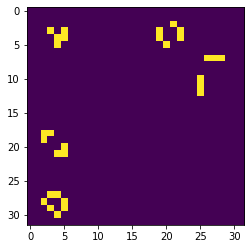

In [7]:
def update(current_matrix):
    next_matrix = np.zeros((current_matrix.shape[0], current_matrix.shape[1]))
    for i, j in np.ndindex(current_matrix.shape):
        alive = np.sum(current_matrix[i-1:i+2, j-1:j+2]) - current_matrix[i, j]
        
        if current_matrix[i, j] == 1 and (alive < 2 or alive > 3):
            next_matrix[i, j] = 0
        elif (current_matrix[i, j] == 1 and (alive == 2 or alive == 3)) or (current_matrix[i, j] == 0 and alive == 3):
            next_matrix[i, j] = 1
        
    return next_matrix

next_gen = update(cells)
plt.imshow(next_gen)

In [8]:
def main():
    cells = initialise(32, 32)
    for i in range(5, 0, -1):
        next_gen = update(cells)
        plt.imshow(next_gen)
        plt.show()
        cells = next_gen

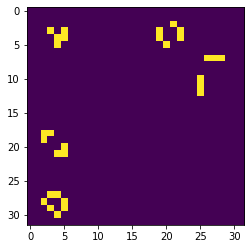

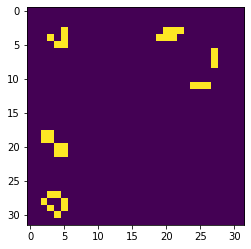

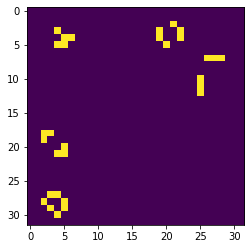

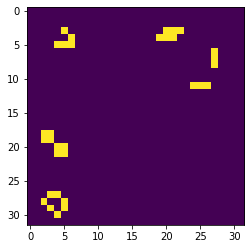

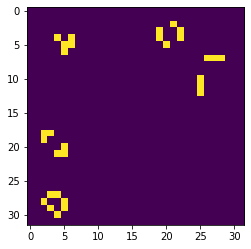

In [9]:
main()